# Project: Titanic EDA

# By: Azubuike Chibuike Henry


For this project, I'm going to take a look at the Titanic's passenger manifest. I'll be exploring this data to see what I can learn regarding the survival rates of different groups of people.

I'll also be providing answers to some questions.

## Step 1: Loading the dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#% matplotlib inline
titanic_data1 = pd.read_csv("titanic.csv")
titanic_data = titanic_data1.copy()
titanic_data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangling
### Data Inspection

In [2]:
titanic_data.shape

(891, 11)

In [3]:
titanic_data['survived'].unique()

array([0, 1], dtype=int64)

In [4]:
titanic_data['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [5]:
titanic_data['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

**Note**: The age column has some missing values

**Note**: Some ages less than 1. I am going to assume they are babies.

## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
2. Which column has the most `NaN` values? How many cells in that column are empty?

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
#checking for null data sets

titanic_data.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

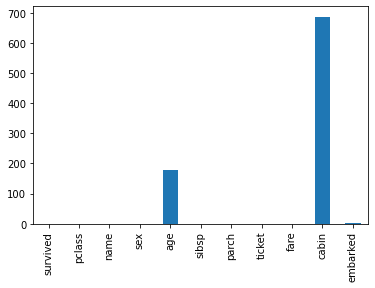

In [8]:
#a bar chart showing how many missing values are in each column

titanic_data.isnull().sum().plot(kind= 'bar');

**From the chart above, age, cabin, embarked are the columns with missing values, and the cabin column has the most missing values**

In [9]:
titanic_data.cabin.isnull().sum()


687

In [10]:
#checking the statistical description for age

titanic_data.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [11]:
#checking the statistical description for passenger fare 

titanic_data.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

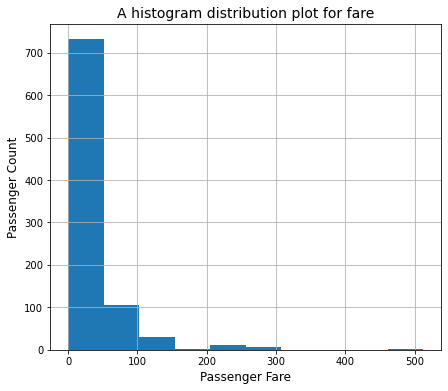

In [70]:
#A histogram distribution plot for fare

plt.figure(figsize=(7,6))
#bins = np.arange(titanic_data['fare'].min(), titanic_data['fare'].max()+10, 10)
titanic_data['fare'].hist()
#plt.hist(data = titanic_data, x ='fare', bins = bins)
plt.xlabel('Passenger Fare', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.title('A histogram distribution plot for fare', fontsize=14)
plt.show()

The above plot reveals that most of the passengers on the ship had a passenger fare below 100, a few others paid between 200 to 300, while those that paid between 450 to 500 were very minute (the very least).

In [13]:
titanic_data.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [14]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Handling Missing Values
I'll be making use of mean, median, and mode imputation techniques to fill missing data, because I wouldn't want to loose much data


In [15]:
age_mean = round(titanic_data.age.mean(),2)
age_mean

29.7

In [16]:
#filling empty age cells with the mean age value

titanic_data['age'].fillna(age_mean, inplace=True)
titanic_data.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [17]:
titanic_data['age'] = titanic_data['age'].astype('int')

*Note*: I'm rounding age values to nearest whole number*



In [18]:
titanic_data['age'].unique()

array([22, 38, 26, 35, 29, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [19]:
titanic_data.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [20]:
titanic_data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [21]:
#Dropping off columns that won't be of much significant to my analysis

titanic_data = titanic_data.drop(['name', 'ticket', 'cabin'], axis=1)

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [22]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    int32  
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 52.3+ KB


In [23]:
titanic_data.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

In [24]:
#checking the rows with null embarked data

titanic_data[titanic_data.embarked.isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
61,1,1,female,38,0,0,80.0,NaN
829,1,1,female,62,0,0,80.0,NaN


In [25]:
#checking the most frequent object in the embarked column

mode_emb = titanic_data.embarked.mode()[0]
mode_emb 

'S'

In [26]:
#filling empty embarked cells will the mode (most frequent) embarked object

titanic_data['embarked'].fillna(mode_emb[0],inplace=True)

In [27]:
titanic_data.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [28]:
titanic_data.survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [29]:
#Assigning 'True' to 'survived=1'

titanic_data.survived == True

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: survived, Length: 891, dtype: bool

In [30]:
#Assigning True survived value (1) to a variable called 'survived',
#and checking the number of passengers that survived

survived = titanic_data.survived == True
survived.sum()

342

In [31]:
#Assigning false survived value (0) to a variable called 'died',
#and checking the number of passengers that died

died = titanic_data.survived == False
died.sum()

549

In [32]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [33]:
#checking the number of passengers in each passenger class

titanic_data.groupby('pclass')['pclass'].count()

pclass
1    216
2    184
3    491
Name: pclass, dtype: int64

In [34]:
#survival rate of passengers by fare

titanic_data.fare[survived].mean()

48.39540760233917

In [35]:
#death rate of passengers by fare

titanic_data.fare[died].mean()

22.117886885245877

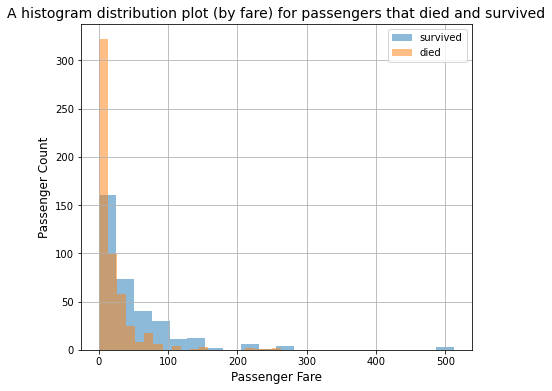

In [36]:
#A histogram distribution plot (by fare) for passengers that died and survived

plt.figure(figsize=(7,6))
titanic_data.fare[survived].hist(alpha=0.5, bins=20, label='survived')
titanic_data.fare[died].hist(alpha=0.5, bins=20, label='died')
plt.xlabel('Passenger Fare', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.title('A histogram distribution plot (by fare) for passengers that died and survived', fontsize=14)
plt.legend()
plt.show()

Overall, on average, the histogram plot (by fare) for passengers that died and survived revealed that there were more survival rates for each fare category; but then, a closer look reveals that passengers who paid more had a higher survival rate compared to those who paid less. 

In [37]:
#checking the survival rate of passengers by passenger class

titanic_data.groupby('pclass').survived.mean()


pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

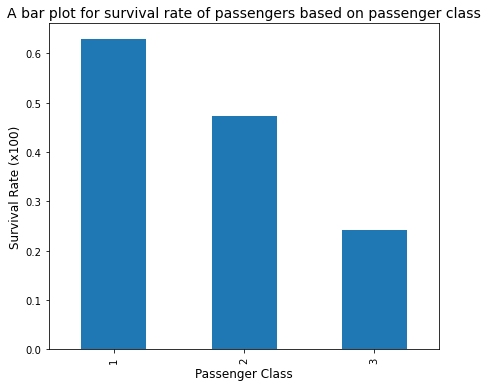

In [38]:
#A bar plot for survival rate of passengers based on passenger class

plt.figure(figsize=(7,6))
titanic_data.groupby('pclass').survived.mean().plot(kind= 'bar')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate (x100)', fontsize=12)
plt.title('A bar plot for survival rate of passengers based on passenger class', fontsize=14)
plt.show()

The bar plot for survival rate of passengers reveals that passengers in the first class had the highest survival rate, followed by those in the second class, and lastly those in the third class. This confirms (as earlier stated) that those who paid the most had a higher chance of survival than those who paid the least; More like those who paid more were given a sort of preferential treatment. 

In [39]:
#checking the survival rate of passengers by sex

titanic_data.groupby('sex').survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

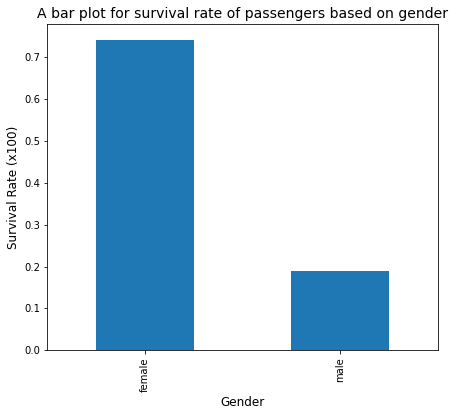

In [40]:
#A bar plot for survival rate of passengers based on gender

plt.figure(figsize=(7,6))
titanic_data.groupby('sex').survived.mean().plot(kind= 'bar');
titanic_data.sex.value_counts()
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate (x100)', fontsize=12)
plt.title('A bar plot for survival rate of passengers based on gender', fontsize=14)
plt.show()

The bar plot above revealed that on a general note, the ladies had more survival rate than the guys. But do we have more ladies on board than guys? And could this be a reason why more ladies survived? Well, we'll find out briefly. 

In [41]:
#checking the statistical description of fare for each gender

titanic_data.groupby('sex')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,314.0,44.479818,57.997698,6.75,12.071875,23.0,55.00,512.3292
male,577.0,25.523893,43.138263,0.00,7.895800,10.5,26.55,512.3292


The above analysis clearly shows that there were infact more guys on board than ladies, with a ratio of about 2:1. This implies that the fact that more ladies survived from our earlier analysis, wasn't because the were more (and hence would have more survivals). So what could be the reason behind the ladies having a very high survival rate over the guys? Since we assertained that persons in the first class had the highest survival rate, I'll dig further to find out if we had majority of ladies in this category

In [42]:
#checking the passenger class count for each gender

titanic_data.groupby('sex')['pclass'].value_counts()

sex     pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: pclass, dtype: int64

The above analysis reveals that the first class catrgory had more guys compared to ladies (with a ratio of about 1.3:1), so logically (all things being equal), we're to have expect more survival rate from the guys in this category. I'd go on to check the survival rate of guys and ladies in this category 

<Figure size 504x432 with 0 Axes>

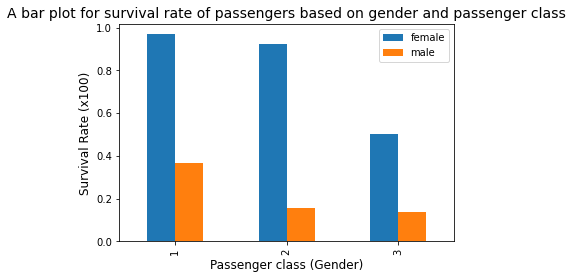

In [51]:
#A bar plot of survival rate of passengers by gender and passenger class

plt.figure(figsize=(7,6))
titanic_data.groupby(['pclass', 'sex']).survived.mean().unstack().plot(kind='bar')
plt.xlabel('Passenger class (Gender)', fontsize=12)
plt.ylabel('Survival Rate (x100)', fontsize=12)
plt.title('A bar plot for survival rate of passengers based on gender and passenger class', fontsize=14)
plt.legend()
plt.show()

The clusterred bar plot above reveals that not just in the first class category, but in all categories, the ladies had a way higher survival rate compared to the guys (despite their numbers); I'd go on to say the ladies were given preferential treatment over the guys in terms of survival

In [47]:
#checking the median fare value for each gender

titanic_data.query('sex == "female"')['fare'].median(), titanic_data.query('sex == "male"')['fare'].median()


(23.0, 10.5)

In [48]:
#checking value count for survival of passengers with siblings

titanic_data.sibsp[survived].value_counts()

0    210
1    112
2     13
3      4
4      3
Name: sibsp, dtype: int64

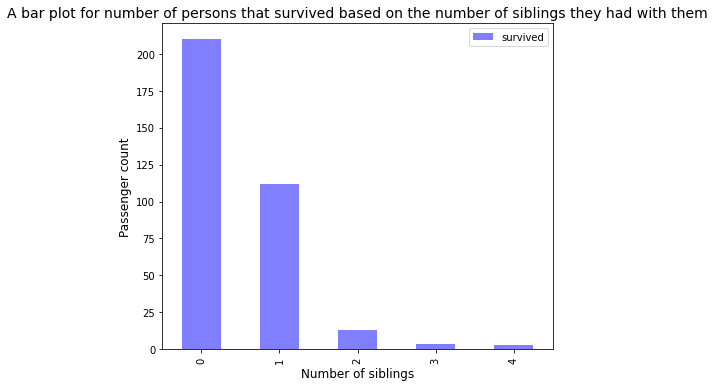

In [49]:
#A bar plot for number of persons that survived based on the number of siblings they had with them

plt.figure(figsize=(7,6))
titanic_data.sibsp[survived].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='survived')
plt.xlabel('Number of siblings', fontsize=12)
plt.ylabel('Passenger count', fontsize=12)
plt.title('A bar plot for number of persons that survived based on the number of siblings they had with them', fontsize=14)
plt.legend()
plt.show()

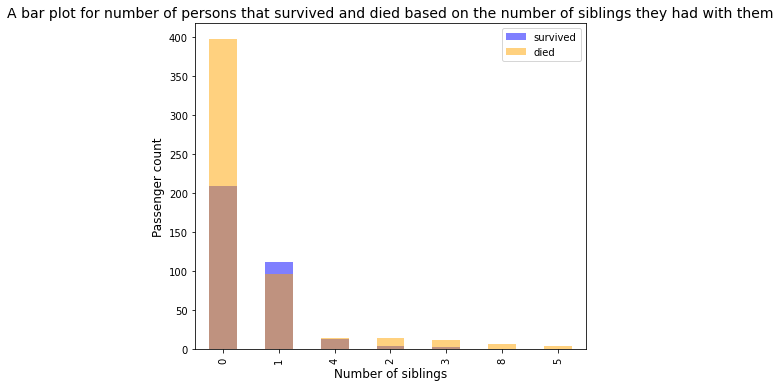

In [50]:
#A bar plot for number of persons that survived and died based on the number of siblings they had with them

plt.figure(figsize=(7,6))
titanic_data.sibsp[survived].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='survived')
titanic_data.sibsp[died].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='died')
plt.xlabel('Number of siblings', fontsize=12)
plt.ylabel('Passenger count', fontsize=12)
plt.title('A bar plot for number of persons that survived and died based on the number of siblings they had with them', fontsize=14)
plt.legend()
plt.show()

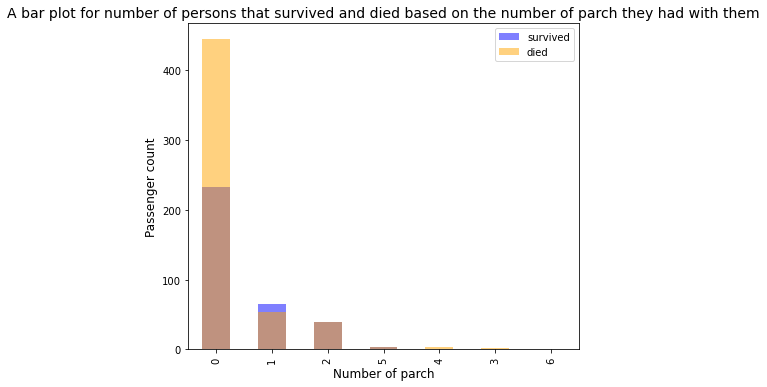

In [52]:
#A bar plot for number of persons that survived and died based on the number of parch they had with them

plt.figure(figsize=(7,6))
titanic_data.parch[survived].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='survived')
titanic_data.parch[died].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='died')
plt.xlabel('Number of parch', fontsize=12)
plt.ylabel('Passenger count', fontsize=12)
plt.title('A bar plot for number of persons that survived and died based on the number of parch they had with them', fontsize=14)
plt.legend()
plt.show()

Generally, the last three (3) bar plots revealed that the number of siblings that passengers had on board with them affected their survival rate. As the number of siblings or family members increased, the chances of survival reduced; meaning that the more siblings or family members that passengers had with them, the lower their chances of survival

In [53]:
#checking the survival rate of passengers at the different embarkation ports 

titanic_data.groupby('embarked').survived.mean()

embarked
C    0.553571
Q    0.389610
S    0.339009
Name: survived, dtype: float64

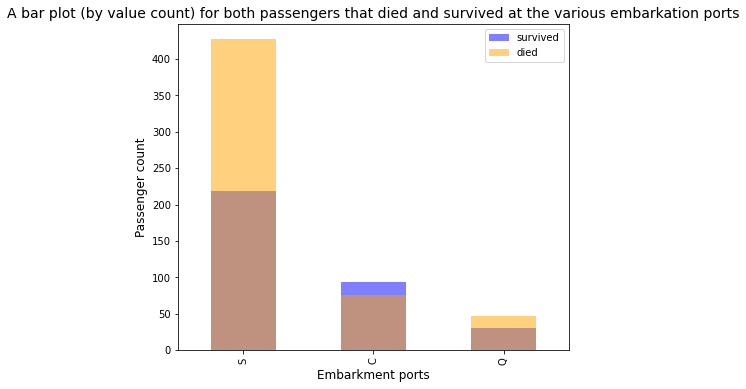

In [54]:
#plotting a bar chart (by value count) for both passengers that died and survived at the various embarkation ports

plt.figure(figsize=(7,6))
titanic_data.embarked[survived].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='survived')
titanic_data.embarked[died].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='died')
plt.xlabel('Embarkment ports', fontsize=12)
plt.ylabel('Passenger count', fontsize=12)
plt.title('A bar plot (by value count) for both passengers that died and survived at the various embarkation ports', fontsize=14)
plt.legend()
plt.show()

The above plot reveals that passengers at Embarkment port C had the best survival rate

In [55]:
#Checking if the captain was on the list

captain = titanic_data1.loc[titanic_data1["name"].str.contains("Capt")]
captain


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S


In [56]:
#dataframe of passengers that died
died_df = titanic_data1[(titanic_data1["survived"]==0)] 

#maxfare among passengers that died
died_df_maxfare = died_df["fare"].max()

most_expensive_ticket_that_died = died_df[died_df["fare"]==died_df_maxfare]

#printing out dataframe for passengers with the most expensive fare that still died
most_expensive_ticket_that_died


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


**Among those passengers that didn't survive, two (2) passengers had the most expensive ticket fare of 263**

In [57]:
#checking survival rate for null ages

null_age = titanic_data1[titanic_data1.age.isnull()]
null_age
null_age.survived.mean()

0.2937853107344633

In [58]:
#checking survival rate for ages less than 12


titanic_age12 = titanic_data.query('age < 12') 
titanic_age12

titanic_age12.survived.mean()


0.5735294117647058

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
 

**Create a new column called FamilyCount which will be the sum of sibsp and parch columns.**

In [59]:
FamilyCount = titanic_data1.sibsp + titanic_data1.parch
pd.DataFrame(FamilyCount, columns=['family_count']).head()

,family_count
0,1
1,1
2,0
3,1
4,0


**Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.**


In [60]:
reverend = titanic_data1.loc[titanic_data1["name"].str.contains("Rev")]
reverend


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
149,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,NaN,S
150,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NaN,S
249,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NaN,S
626,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q
848,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,NaN,S
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S


In [61]:
titanic_data1['IsReverend'] = titanic_data1["name"].str.contains("Rev").astype('int')
titanic_data1.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,IsReverend
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


**Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column**


In [62]:
EMBARKED = pd.get_dummies(titanic_data1['embarked'])
EMBARKED.columns=['Embarked_C', 'Embarked_Q', 'Embarked_S']
EMBARKED.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


**Create 2 columns: female and male. These columns will have 1's and 0's that correspond to the female and male values in the sex**


In [63]:
SEX = pd.get_dummies(titanic_data1['sex'])
SEX.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


## Step 4: Exploratory analysis (QUESTIONS)
1. What was the survival rate overall?
**Ans: Generally, the survival rate was = 38.4%**

2. Which gender fared the worst? What was their survival rate?
**Ans: The male gender fared the worst, with an average fare_mean of 25.52. Their survival rate was 18.9%, against the females that had a survival rate of 74.2%**

3. What was the survival rate for each `Pclass`?
**Ans: P1 = 63.0%,  P2 = 47.3%,  P3 = 24.4%**

4. Did any reverends survive? How many?
**Ans: There were six (6) Reverends on board, but none of them survived.**

5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
**Ans: Cabin mark not understood**

6. What is the survival rate for people whose `Age` is empty?
**Ans: Null age set had a survival rate of 29.4%**

7. What is the survival rate for each port of embarkation?
**Ans: C = 55.4%,  Q = 39%,  S = 33.7%**

8. What is the survival rate for children (under 12) in each `Pclass`?
**Ans: Children under 12years had a survival rate of 57.4%**

9. Did the captain of the ship survive? Is he on the list?
**Ans: The captain (Capt. Edward Gifford, Crosby) was on the list, but he didn't survive**

10. Of all the people that died, who had the most expensive ticket? How much did it cost?
**Ans: Among those passengers that didn't survive, two (2) passengers had the most expensive ticket fare of 263. Their names were : Mr. Charles Alexander, Fortune and Mr. Mark, Fortune**

11. Does having family on the boat help or hurt your chances of survival?
**Ans: Having family and siblings did hurt and reduce their chances of survival; the survival rate decreased as the number of family/siblings increased, and as a matter of fact those that had five (5) siblings didn't even survive at all.**

**The End**